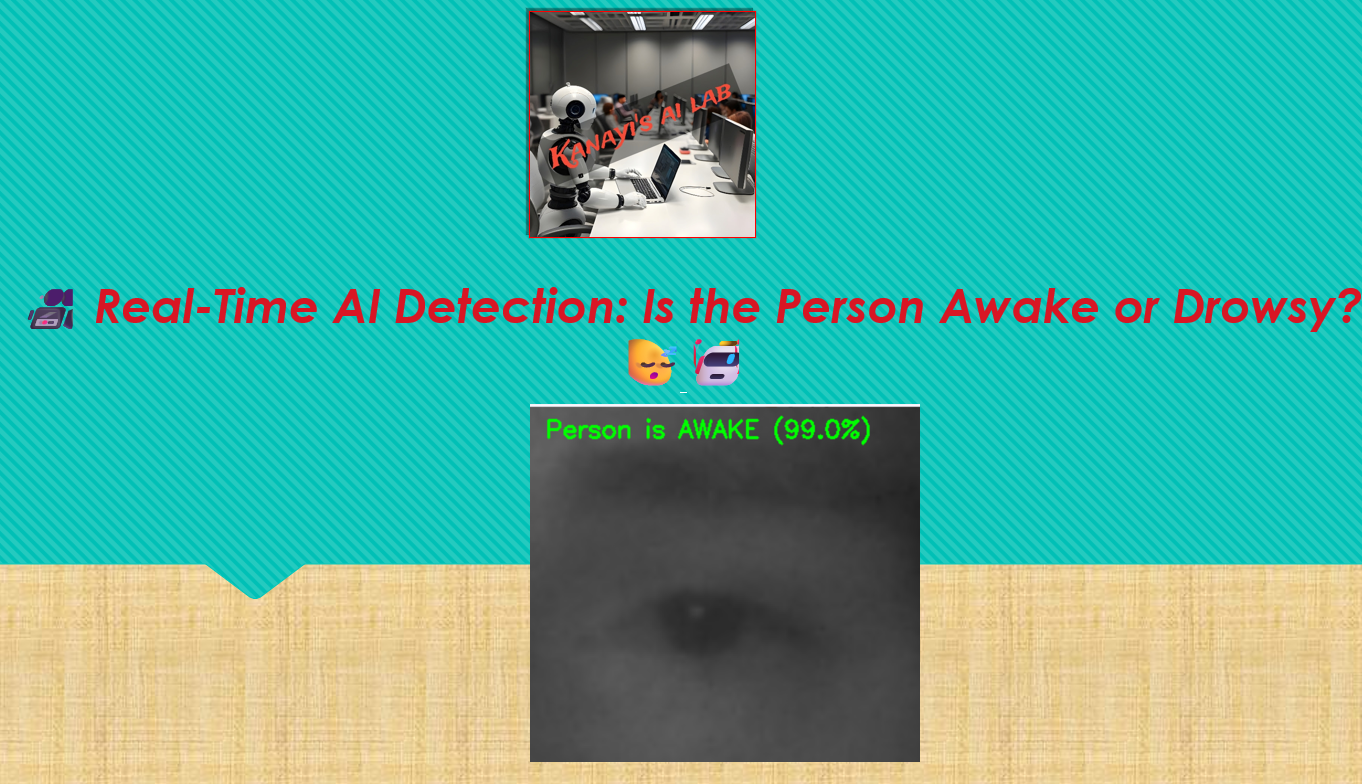

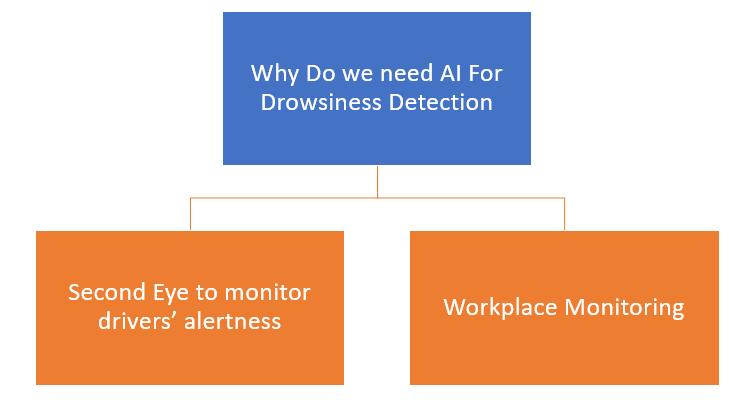

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# Set paths
train_path = r"C:\Users\Admin\AwakeVsDrowsiness\Data\Train"
model_save_path = r"C:\Users\Admin\AwakeVsDrowsiness\AwakeVsDrowsiness.h5"

In [11]:
# Parameters
image_size = (150, 150)
batch_size = 32
epochs = 10

In [13]:
# Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
# Load Training and Validation Data
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 12062 images belonging to 2 classes.


In [17]:
val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3015 images belonging to 2 classes.


In [19]:
#  Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.5859 - loss: 0.6527 - val_accuracy: 0.7562 - val_loss: 0.4917
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 178s 473ms/step - accuracy: 0.7718 - loss: 0.4733 - val_accuracy: 0.7479 - val_loss: 0.5655
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 178s 472ms/step - accuracy: 0.8315 - loss: 0.3784 - val_accuracy: 0.8202 - val_loss: 0.3919
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1271s 3s/step - accuracy: 0.8532 - loss: 0.3464 - val_accuracy: 0.8100 - val_loss: 0.5164
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 216s 574ms/step - accuracy: 0.8736 - loss: 0.3157 - val_accuracy: 0.8285 - val_loss: 0.3831
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 269s 715ms/step - accuracy: 0.8784 - loss: 0.2933 - val_accuracy: 0.8312 - val_loss: 0.4318
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 224s 594ms/step - accuracy: 0.8948 - loss: 0.2720 - val_accuracy: 0.7718 - val_loss: 0.4921
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 240s 638ms/step - accuracy: 0.9008 - loss

In [ ]:
# Save the Trained Model
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

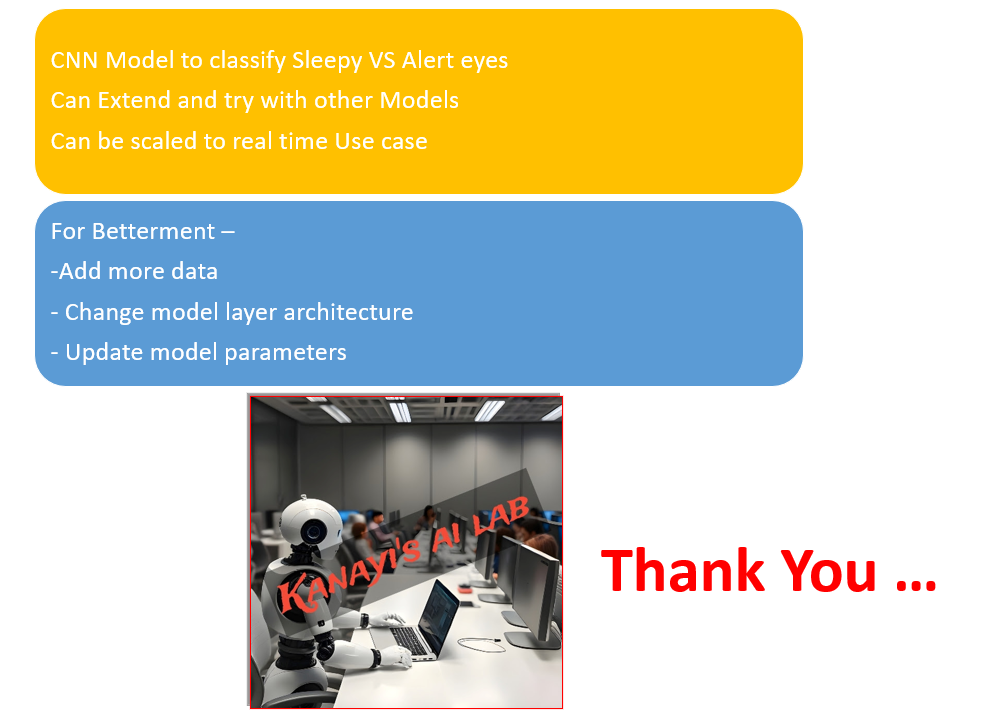